##Prévision des crédits logement:

In [44]:
# Importer les packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pickle

# Ouvrir la base de données

In [3]:
df_credit=pd.read_csv('/content/drive/MyDrive/train.csv')

In [4]:
df_credit

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df= df_credit.copy()

In [6]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.shape

(614, 13)

In [9]:
# verifier si on a des valeurs manquantes
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Pour supprimer les valeur manquantes:
- Pour les variables catégoriques: on va les remplacer par le mode
- Pour les variables numériques: on va les remplacer par la mediane

In [10]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
var_cat=['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Credit_History', 'Property_Area', 'Loan_Status']
var_num=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']
print('les variables catégoriques sont:',var_cat)
print('les variables numériques sont:',var_num)

les variables catégoriques sont: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
les variables numériques sont: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


In [12]:
# supprimer les valeurs manquantes coté variables catégoriques

df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [13]:
# supprimer les valeurs manquantes coté variables numériques
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace=True)

In [14]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Analyse univariée

In [15]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [16]:
df['Loan_Status'].value_counts(normalize=True)*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

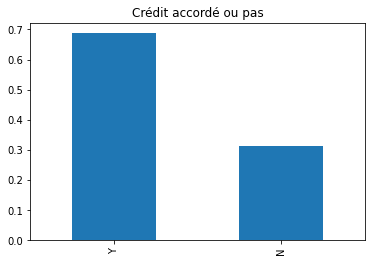

In [17]:
df['Loan_Status'].value_counts(normalize=True).plot.bar(title='Crédit accordé ou pas')

Les variables catégoriques

In [18]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [19]:
df['Gender'].value_counts(normalize=True)*100

Male      81.758958
Female    18.241042
Name: Gender, dtype: float64

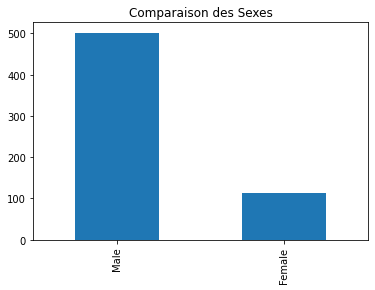

In [20]:
df['Gender'].value_counts().plot.bar(title='Comparaison des Sexes')

In [21]:
# Married, self_employed,credit_history

In [22]:
# Depedents
df['Dependents'].value_counts(normalize=True)*100

0     58.631922
1     16.612378
2     16.449511
3+     8.306189
Name: Dependents, dtype: float64

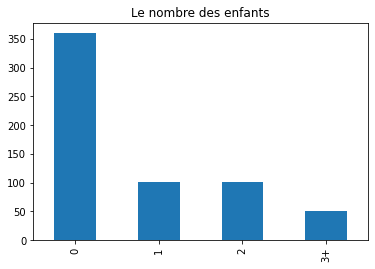

In [23]:
df['Dependents'].value_counts().plot.bar(title='Le nombre des enfants')

Les variables numériques

In [24]:
df[var_num].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423
std,6109.041673,2926.248369,84.107233,64.428629
min,150.000000,0.000000,9.000000,12.000000
25%,2877.500000,0.000000,100.250000,360.000000
50%,3812.500000,1188.500000,128.000000,360.000000
75%,5795.000000,2297.250000,164.750000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


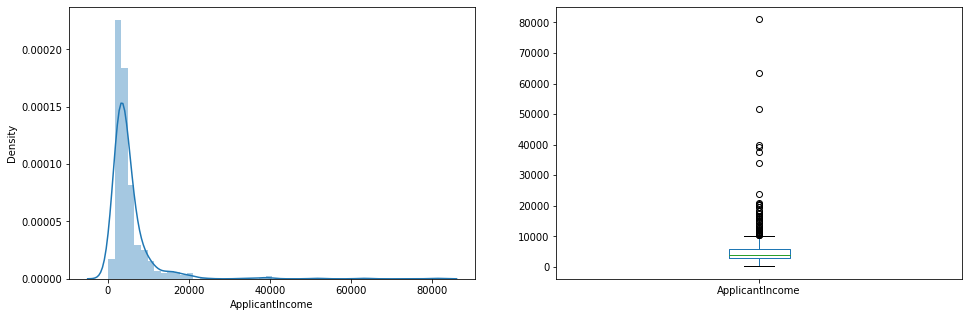

In [25]:
# applicantincome
plt.figure(1)

plt.subplot(121)
sns.distplot(df['ApplicantIncome'])

plt.subplot(122)
df['ApplicantIncome'].plot.box(figsize=(16,5))

plt.suptitle('')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


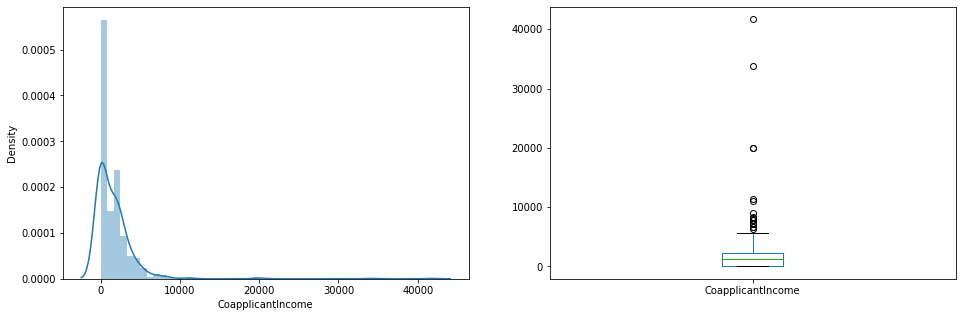

In [26]:
# applicantincome
plt.figure(1)

plt.subplot(121)
sns.distplot(df['CoapplicantIncome'])

plt.subplot(122)
df['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.suptitle('')
plt.show()

## Analyse bivariée

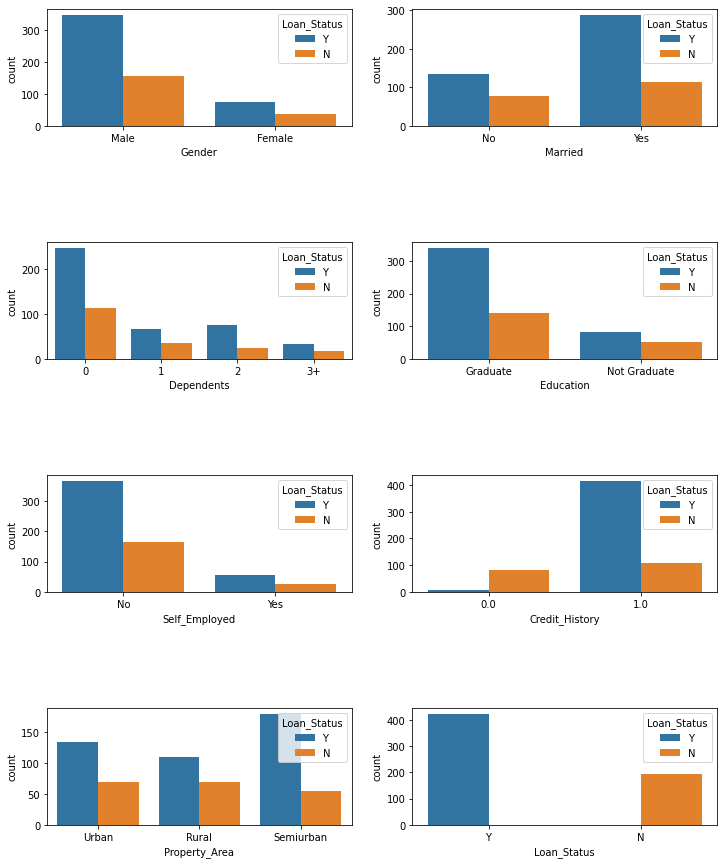

In [27]:
# les variables catégoriques
fig,axes=plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(var_cat):
  row,col=idx//2,idx%2
  sns.countplot(x=cat_col,data=df,hue='Loan_Status',ax=axes[row,col])
plt.subplots_adjust(hspace=1)

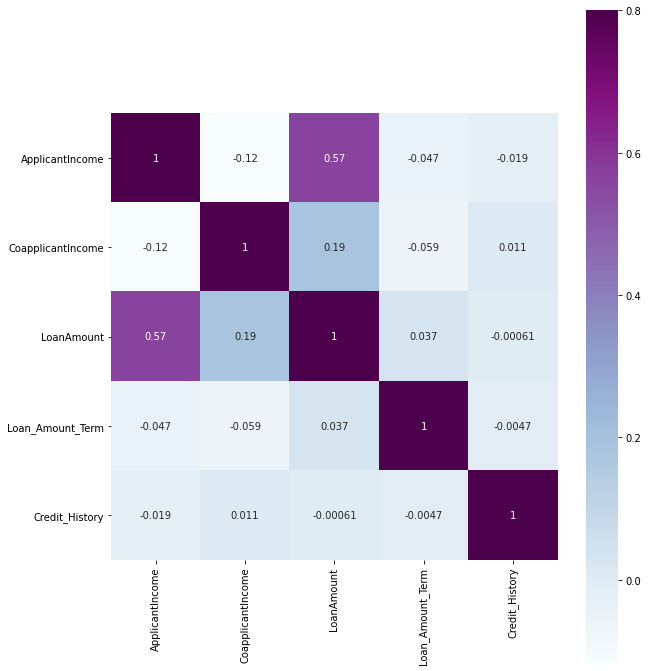

In [28]:
#correlation des variables numérique
matrix=df.corr()
f,ax=plt.subplots(figsize=(10,12))
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu',annot=True)

# Création du modèle

In [29]:
df_cat=df[var_cat]
df_cat

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y
...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,1.0,Urban,Y


In [30]:
df_cat=pd.get_dummies(df_cat,drop_first=True)
df_cat

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1.0,1,0,0,0,0,0,0,0,1,1
1,1.0,1,1,1,0,0,0,0,0,0,0
2,1.0,1,1,0,0,0,0,1,0,1,1
3,1.0,1,1,0,0,0,1,0,0,1,1
4,1.0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0,0,0,0,0,0,0,0,0,1
610,1.0,1,1,0,0,1,0,0,0,0,1
611,1.0,1,1,1,0,0,0,0,0,1,1
612,1.0,1,1,0,1,0,0,0,0,1,1


In [31]:
df_num=df[var_num]
df_num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,128.0,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0
...,...,...,...,...
609,2900,0.0,71.0,360.0
610,4106,0.0,40.0,180.0
611,8072,240.0,253.0,360.0
612,7583,0.0,187.0,360.0


In [32]:
df_encoded=pd.concat([df_cat,df_num],axis=1)
df_encoded

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1.0,1,0,0,0,0,0,0,0,1,1,5849,0.0,128.0,360.0
1,1.0,1,1,1,0,0,0,0,0,0,0,4583,1508.0,128.0,360.0
2,1.0,1,1,0,0,0,0,1,0,1,1,3000,0.0,66.0,360.0
3,1.0,1,1,0,0,0,1,0,0,1,1,2583,2358.0,120.0,360.0
4,1.0,1,0,0,0,0,0,0,0,1,1,6000,0.0,141.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0,0,0,0,0,0,0,0,0,1,2900,0.0,71.0,360.0
610,1.0,1,1,0,0,1,0,0,0,0,1,4106,0.0,40.0,180.0
611,1.0,1,1,1,0,0,0,0,0,1,1,8072,240.0,253.0,360.0
612,1.0,1,1,0,1,0,0,0,0,1,1,7583,0.0,187.0,360.0


In [33]:
y=df_encoded['Loan_Status_Y']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status_Y, Length: 614, dtype: uint8

In [34]:
X=df_encoded.drop('Loan_Status_Y',axis=1)
X

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1.0,1,0,0,0,0,0,0,0,1,5849,0.0,128.0,360.0
1,1.0,1,1,1,0,0,0,0,0,0,4583,1508.0,128.0,360.0
2,1.0,1,1,0,0,0,0,1,0,1,3000,0.0,66.0,360.0
3,1.0,1,1,0,0,0,1,0,0,1,2583,2358.0,120.0,360.0
4,1.0,1,0,0,0,0,0,0,0,1,6000,0.0,141.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0,0,0,0,0,0,0,0,0,2900,0.0,71.0,360.0
610,1.0,1,1,0,0,1,0,0,0,0,4106,0.0,40.0,180.0
611,1.0,1,1,1,0,0,0,0,0,1,8072,240.0,253.0,360.0
612,1.0,1,1,0,1,0,0,0,0,1,7583,0.0,187.0,360.0


In [36]:
# spécifier la partie test et la partie train
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=6)

In [37]:
#instancier le modele
clf=LogisticRegression()
#entrainer le modèle
clf.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
#tester le modèle
pred=clf.predict(x_test)

In [39]:
pred

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [40]:
y_test

387    0
266    1
292    1
392    1
332    1
      ..
309    1
511    1
98     1
238    1
462    1
Name: Loan_Status_Y, Length: 123, dtype: uint8

In [41]:
accuracy_score(y_test,pred)

0.8373983739837398

In [42]:
X.columns

Index(['Credit_History', 'Gender_Male', 'Married_Yes', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Not Graduate',
       'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')

In [43]:
#faire une prévision
profil_test=[[1,1,1,0,0,0,1,0,1,0,100,0,400,360]]
clf.predict(profil_test)

array([1], dtype=uint8)

In [45]:
#enregistrer le modèle
pickle.dump(clf,open('prevision_credit.pkl','wb'))